# Clustering Categorical Data and Dimensional Reduction 

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from sklearn.cluster import KMeans

from sklearn.manifold import MDS
import mpl_toolkits.mplot3d
import random

## From https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

## Load the data

In [2]:
raw_data = pd.read_csv('Data for Clustering - Density.txt')
raw_data

,Partido,Count_Words,Count_Different,abandono escolar,acesso,administração pública,animal,apoio,atingir objetivos desenvolvimento,através,...,sobre,social,socialismo,também,tem,todo,trabalhar,é,é essencial,é necessário
0,BE,38763,101,103.191187,2605.577484,361.169156,1083.507468,2863.555452,0.00000,1754.250187,...,3431.106983,6243.066842,0.000000,2012.228156,3921.265124,4127.647499,3998.658515,8719.655341,51.595594,438.562547
1,CDS,1876,82,0.000000,1066.098081,0.000000,0.000000,4264.392324,0.00000,533.049041,...,2665.245203,6396.588486,0.000000,1599.147122,1599.147122,7995.735608,1599.147122,5863.539446,533.049041,0.000000
2,CH,2309,86,0.000000,2165.439584,0.000000,0.000000,1299.263751,0.00000,2165.439584,...,1732.351667,16024.252923,7362.494586,433.087917,433.087917,2598.527501,1299.263751,5630.142919,0.000000,0.000000
3,IL,102905,108,524.755843,3167.970458,1098.100189,437.296536,1613.138331,0.00000,1826.927749,...,3488.654584,3294.300568,29.153102,2895.874836,4888.003498,3955.104222,1992.128662,11282.250620,553.908945,719.109859
4,Livre,20294,102,0.000000,3449.295358,788.410368,2463.782399,3252.192766,0.00000,5814.526461,...,3055.090174,6356.558589,49.275648,1921.750271,1823.198975,7687.001084,4730.462206,3991.327486,147.826944,591.307776
5,PAN,31879,103,94.105838,2572.226230,564.635026,9096.897644,3293.704319,972.42699,2446.751780,...,2603.594843,3732.864895,0.000000,1693.905079,3105.492644,7748.047304,2666.332068,5803.193325,345.054738,501.897801
6,PCP,28417,104,70.380406,2287.363198,1126.086498,0.000000,3167.118274,0.00000,3624.590914,...,1618.749340,5982.334518,0.000000,1513.178731,3976.492944,3413.449696,2041.031777,9958.827462,175.951015,527.853046
7,PS,32349,100,30.912857,3184.024236,1916.597113,123.651427,5564.314198,0.00000,4853.318495,...,1576.555690,6151.658475,0.000000,2318.464249,1143.775696,4915.144208,3462.239946,4204.148505,340.041423,247.302853
8,PSD,38165,106,26.202018,1807.939211,1100.484737,288.222193,3118.040089,0.00000,3196.646142,...,1755.535176,6183.676143,0.000000,3458.666317,4742.565178,3904.100616,1912.747282,10323.594917,157.212105,733.656492


## Select the features

In [3]:
x = raw_data.iloc[:,1:len(raw_data.columns)]
x

,Count_Words,Count_Different,abandono escolar,acesso,administração pública,animal,apoio,atingir objetivos desenvolvimento,através,aumento,...,sobre,social,socialismo,também,tem,todo,trabalhar,é,é essencial,é necessário
0,38763,101,103.191187,2605.577484,361.169156,1083.507468,2863.555452,0.00000,1754.250187,2631.375281,...,3431.106983,6243.066842,0.000000,2012.228156,3921.265124,4127.647499,3998.658515,8719.655341,51.595594,438.562547
1,1876,82,0.000000,1066.098081,0.000000,0.000000,4264.392324,0.00000,533.049041,2132.196162,...,2665.245203,6396.588486,0.000000,1599.147122,1599.147122,7995.735608,1599.147122,5863.539446,533.049041,0.000000
2,2309,86,0.000000,2165.439584,0.000000,0.000000,1299.263751,0.00000,2165.439584,2165.439584,...,1732.351667,16024.252923,7362.494586,433.087917,433.087917,2598.527501,1299.263751,5630.142919,0.000000,0.000000
3,102905,108,524.755843,3167.970458,1098.100189,437.296536,1613.138331,0.00000,1826.927749,2332.248190,...,3488.654584,3294.300568,29.153102,2895.874836,4888.003498,3955.104222,1992.128662,11282.250620,553.908945,719.109859
4,20294,102,0.000000,3449.295358,788.410368,2463.782399,3252.192766,0.00000,5814.526461,1379.718143,...,3055.090174,6356.558589,49.275648,1921.750271,1823.198975,7687.001084,4730.462206,3991.327486,147.826944,591.307776
5,31879,103,94.105838,2572.226230,564.635026,9096.897644,3293.704319,972.42699,2446.751780,1976.222592,...,2603.594843,3732.864895,0.000000,1693.905079,3105.492644,7748.047304,2666.332068,5803.193325,345.054738,501.897801
6,28417,104,70.380406,2287.363198,1126.086498,0.000000,3167.118274,0.00000,3624.590914,2604.075026,...,1618.749340,5982.334518,0.000000,1513.178731,3976.492944,3413.449696,2041.031777,9958.827462,175.951015,527.853046
7,32349,100,30.912857,3184.024236,1916.597113,123.651427,5564.314198,0.00000,4853.318495,2658.505673,...,1576.555690,6151.658475,0.000000,2318.464249,1143.775696,4915.144208,3462.239946,4204.148505,340.041423,247.302853
8,38165,106,26.202018,1807.939211,1100.484737,288.222193,3118.040089,0.00000,3196.646142,2174.767457,...,1755.535176,6183.676143,0.000000,3458.666317,4742.565178,3904.100616,1912.747282,10323.594917,157.212105,733.656492


## Clustering

In [4]:
distortions = []
K = range(1,7)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


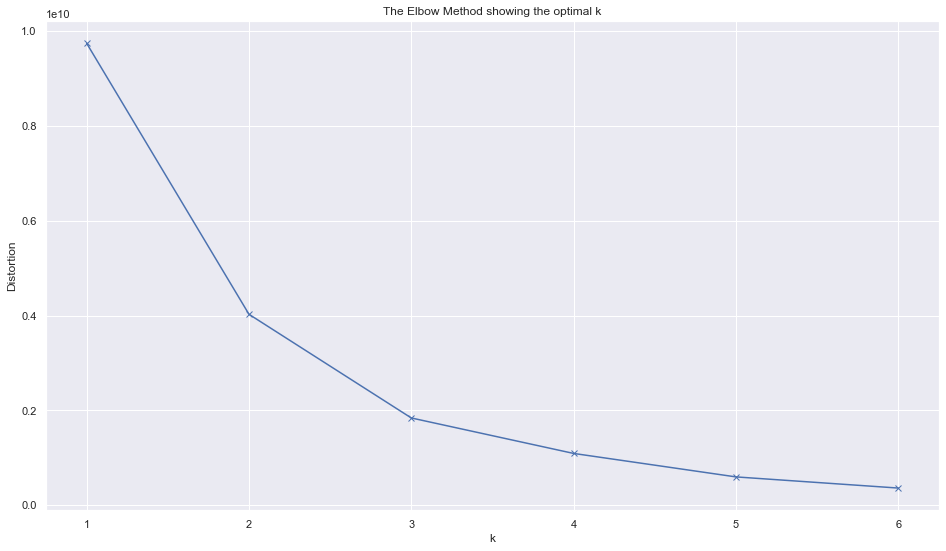

In [5]:
plt.figure(figsize=(16,9))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()    

## Clustering results

In [6]:
K = range(2,5)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    identified_clusters = kmeans.fit_predict(x)
    parties=raw_data['Partido'].tolist() 
    identified_clusters
    print(np.vstack((parties, identified_clusters)).T)

[['BE' '0']
 ['CDS' '0']
 ['CH' '0']
 ['IL' '1']
 ['Livre' '0']
 ['PAN' '0']
 ['PCP' '0']
 ['PS' '0']
 ['PSD' '0']]
[['BE' '0']
 ['CDS' '2']
 ['CH' '2']
 ['IL' '1']
 ['Livre' '0']
 ['PAN' '0']
 ['PCP' '0']
 ['PS' '0']
 ['PSD' '0']]
[['BE' '0']
 ['CDS' '1']
 ['CH' '3']
 ['IL' '2']
 ['Livre' '0']
 ['PAN' '0']
 ['PCP' '0']
 ['PS' '0']
 ['PSD' '0']]


In [7]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

x.index=raw_data['Partido'].tolist()
pwdist = pdist(x, metric='euclidean')

## Create a square dataframe with the pairwise distances: the distance matrix
distmat = pd.DataFrame(
    squareform(pwdist), # pass a symmetric distance matrix
    columns = x.index,
    index = x.index
)

## Normalise by scaling between 0-1, using dataframe max value to keep the symmetry.
## This is essentially a cosmetic step to 

distmat_mm=((distmat-distmat.min().min())/(distmat.max().max()-distmat.min().min()))*1


## Affinity matrix
affinmat_mm = pd.DataFrame(1-distmat_mm, distmat.index, distmat.columns)

#pd.DataFrame(distmat_mm, distmat.index, distmat.columns)

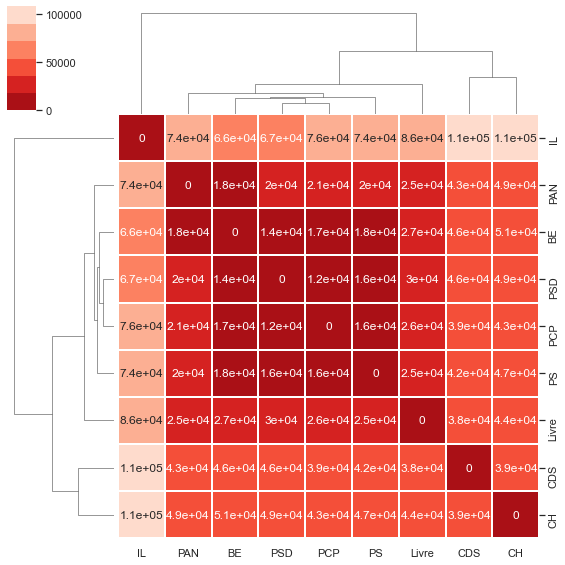

In [8]:
## Perform hierarchical linkage on the distance matrix using Ward's method.
distmat_link = hc.linkage(pwdist, method="ward", optimal_ordering=True )

sns.clustermap(
    distmat,
    annot = True,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    #standard_scale=1,
    row_linkage=distmat_link,
    col_linkage=distmat_link,
    figsize=(8,8)).fig ##.suptitle('Portuguese Parties Programs/Manifest, Clustermap')

plt.show()

## Dimensional reduction to 1, 2, 3 and 4 dimensions

In [9]:
mds = MDS(n_components=1, dissimilarity='precomputed',random_state=2020, n_init=100, max_iter=1000)

## We use the normalised distance matrix but results would
## be similar with the original one, just with a different scale/axis
results = mds.fit(distmat_mm.values)

ExportMDS = pd.DataFrame(columns = ['Partido', '1Dimension1'])

for i in range(len(raw_data['Partido'])):
    ExportMDS = ExportMDS.append({'Partido': parties[i], 
                      '1Dimension1' : results.embedding_[i][0]},
                      ignore_index = True)

ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
    
ExportMDS.sort_values(by=['1Dimension1'])

,Partido,1Dimension1
2,CH,-0.442438
1,CDS,-0.330400
4,Livre,-0.142297
5,PAN,-0.036363
6,PCP,0.008233
0,BE,0.064226
7,PS,0.079967
8,PSD,0.123747
3,IL,0.675326


In [10]:
mds = MDS(n_components=2, dissimilarity='precomputed',random_state=2020, n_init=100, max_iter=1000)

## We use the normalised distance matrix but results would
## be similar with the original one, just with a different scale/axis
results = mds.fit(distmat_mm.values)
coords = results.embedding_

ExportMDS['2Dimension1'] = coords[:,0]
ExportMDS['2Dimension2'] = coords[:,1]
ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
ExportMDS

,Partido,1Dimension1,2Dimension1,2Dimension2
0,BE,0.064226,0.054445,-0.093489
1,CDS,-0.330400,0.011028,0.368967
2,CH,-0.442438,-0.266686,0.293162
3,IL,0.675326,-0.081173,-0.660466
4,Livre,-0.142297,0.162060,0.147118
5,PAN,-0.036363,0.160185,-0.018627
6,PCP,0.008233,-0.044763,0.017881
7,PS,0.079967,0.050517,0.012667
8,PSD,0.123747,-0.045613,-0.067212


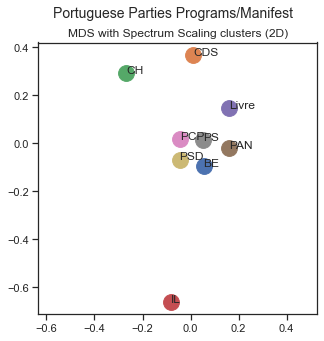

In [11]:
sns.set()
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Portuguese Parties Programs/Manifest', fontsize=14)
ax.set_title('MDS with Spectrum Scaling clusters (2D)')

for label, x, y in zip(distmat_mm.columns, coords[:, 0], coords[:, 1]):
    ax.scatter(x, y, s=250)
    ax.axis('equal')
    ax.annotate(label,xy = (x, y))

plt.show()

In [12]:
class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)
        
def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)
mds = MDS(n_components=3, dissimilarity='precomputed',random_state=1234, n_init=100, max_iter=1000)
results = mds.fit(distmat.values)
parties = distmat.columns
coords = results.embedding_

ExportMDS['3Dimension1'] = coords[:,0]
ExportMDS['3Dimension2'] = coords[:,1]
ExportMDS['3Dimension3'] = coords[:,2]
ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
ExportMDS

,Partido,1Dimension1,2Dimension1,2Dimension2,3Dimension1,3Dimension2,3Dimension3
0,BE,0.064226,0.054445,-0.093489,-8913.282819,-2173.669518,-5034.938215
1,CDS,-0.330400,0.011028,0.368967,35020.375171,-15737.401526,8478.044509
2,CH,-0.442438,-0.266686,0.293162,26340.146651,11825.257000,32657.601003
3,IL,0.675326,-0.081173,-0.660466,-45789.302299,24676.065206,-49293.153439
4,Livre,-0.142297,0.162060,0.147118,-1966.500711,-17246.563708,16054.718728
5,PAN,-0.036363,0.160185,-0.018627,-1144.548716,-13665.513079,-5578.053152
6,PCP,0.008233,-0.044763,0.017881,5874.610655,3570.057251,-744.805911
7,PS,0.079967,0.050517,0.012667,-7300.971704,1616.189513,8432.895454
8,PSD,0.123747,-0.045613,-0.067212,-2120.526229,7135.578860,-4972.308977


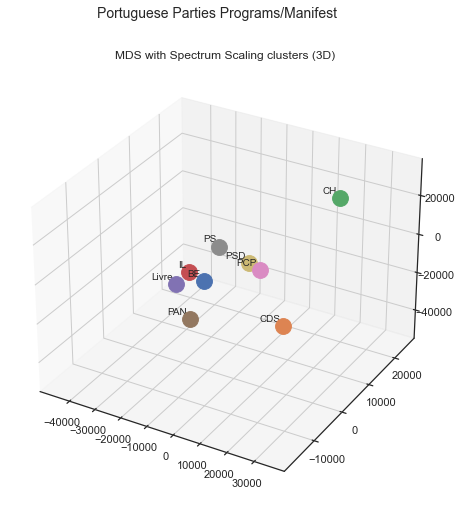

In [13]:
sns.set()
sns.set_style("ticks")

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

fig.suptitle('Portuguese Parties Programs/Manifest', fontsize=14)
ax.set_title('MDS with Spectrum Scaling clusters (3D)')

for label, x, y, z in zip(parties, coords[:, 0], coords[:, 1], coords[:, 2]):
    #print(label,pmds_colors[label])
    ax.scatter(x, y, z, s=250)
    annotate3D(ax, s=str(label), xyz=[x,y,z], fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')  
plt.show()

In [14]:
mds = MDS(n_components=4, dissimilarity='precomputed',random_state=2020, n_init=100, max_iter=1000)

## We use the normalised distance matrix but results would
## be similar with the original one, just with a different scale/axis
results = mds.fit(distmat_mm.values)
coords = results.embedding_

ExportMDS['4Dimension1'] = coords[:,0]
ExportMDS['4Dimension2'] = coords[:,1]
ExportMDS['4Dimension3'] = coords[:,2]
ExportMDS['4Dimension4'] = coords[:,3]
ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
ExportMDS

,Partido,1Dimension1,2Dimension1,2Dimension2,3Dimension1,3Dimension2,3Dimension3,4Dimension1,4Dimension2,4Dimension3,4Dimension4
0,BE,0.064226,0.054445,-0.093489,-8913.282819,-2173.669518,-5034.938215,-0.003640,-0.058979,-0.060315,-0.009910
1,CDS,-0.330400,0.011028,0.368967,35020.375171,-15737.401526,8478.044509,-0.093511,0.206752,0.214273,-0.185333
2,CH,-0.442438,-0.266686,0.293162,26340.146651,11825.257000,32657.601003,0.131538,0.368846,0.015075,-0.035442
3,IL,0.675326,-0.081173,-0.660466,-45789.302299,24676.065206,-49293.153439,0.296544,-0.540314,-0.237786,0.013046
4,Livre,-0.142297,0.162060,0.147118,-1966.500711,-17246.563708,16054.718728,-0.133182,0.133359,-0.004095,0.121961
5,PAN,-0.036363,0.160185,-0.018627,-1144.548716,-13665.513079,-5578.053152,-0.113172,0.009424,-0.083140,-0.033657
6,PCP,0.008233,-0.044763,0.017881,5874.610655,3570.057251,-744.805911,-0.002149,0.002296,0.086587,0.042565
7,PS,0.079967,0.050517,0.012667,-7300.971704,1616.189513,8432.895454,-0.109330,-0.055750,0.041455,0.029516
8,PSD,0.123747,-0.045613,-0.067212,-2120.526229,7135.578860,-4972.308977,0.026902,-0.065635,0.027945,0.057254


In [15]:
from sklearn.manifold import MDS
import mpl_toolkits.mplot3d
import random

distortions = []
K = range(1,6)
for k in K:
    mds = MDS(n_components=k, dissimilarity='precomputed',random_state=1234, n_init=100, max_iter=1000)
    results = mds.fit(distmat.values)
    distortions.append(mds.stress_)

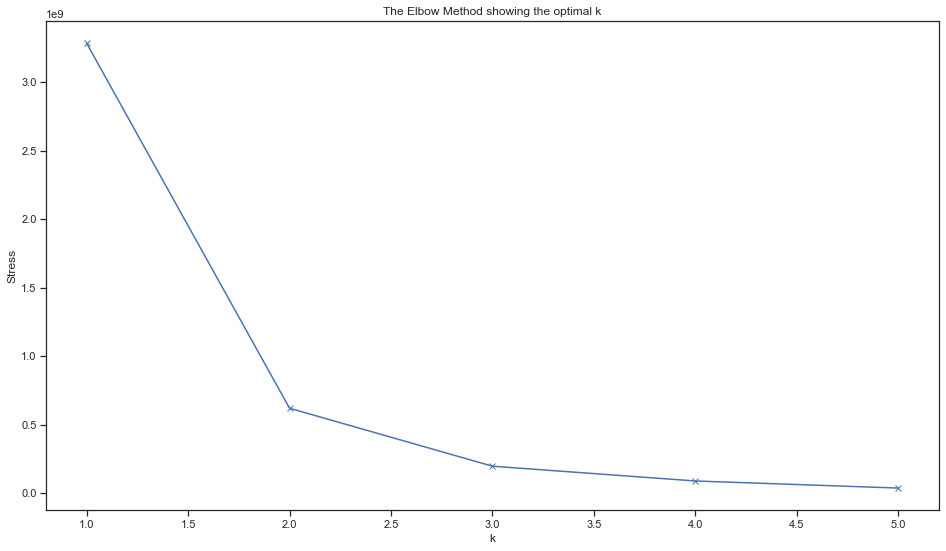

In [16]:
plt.figure(figsize=(16,9))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Stress')
plt.title('The Elbow Method showing the optimal k')
plt.show()